In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import pylab
import matplotlib.pyplot as plt

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [9]:
x_train = x_train.astype(float) / 255
x_test = x_test.astype(float) / 255

In [10]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

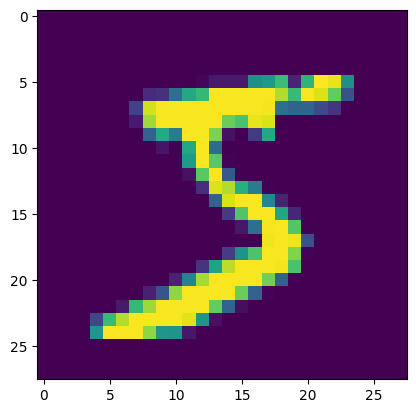

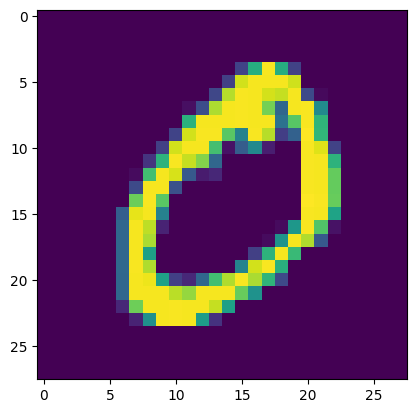

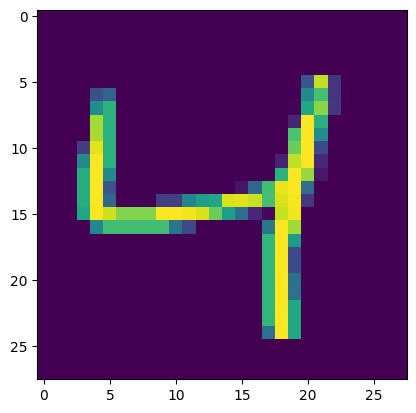

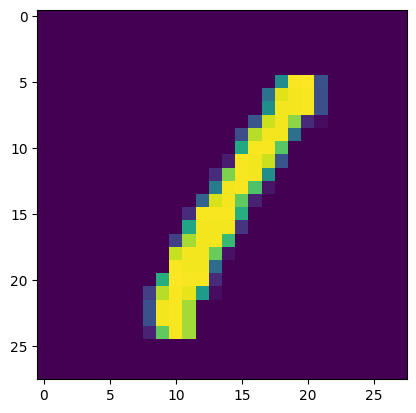

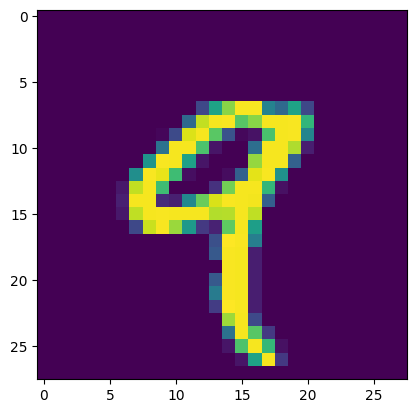

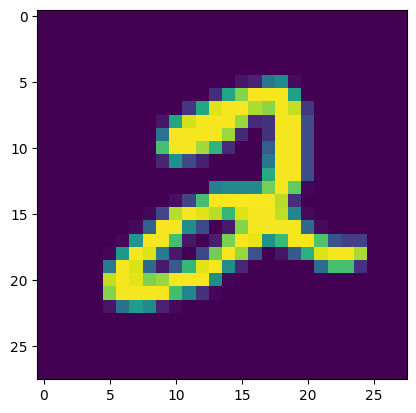

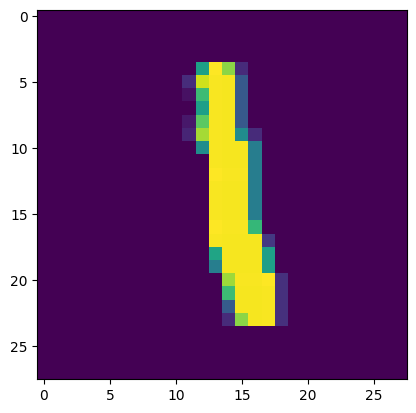

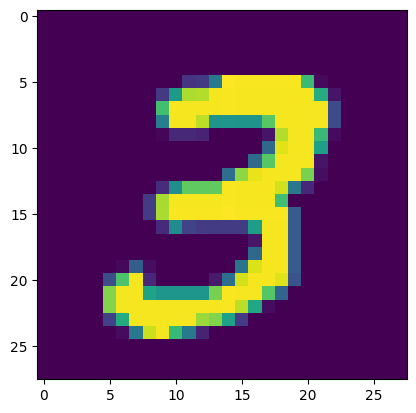

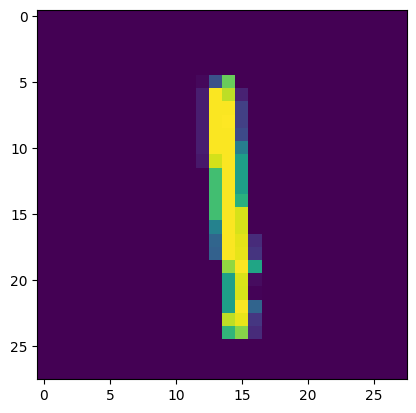

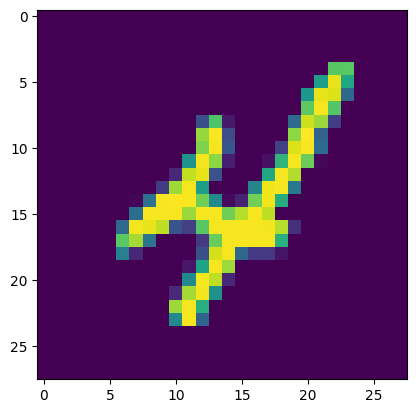

In [11]:
for i in range(10):
  plt.imshow(x_train[i].reshape(28, 28))
  plt.show()

In [12]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [13]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [14]:
x_trainraveled = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_testraveled = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [15]:
mlp = keras.Sequential([
    layers.Dense(320, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(10, activation='softmax'),
])

In [16]:
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = mlp.fit(x_trainraveled, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5023 - loss: 1.8506 - val_accuracy: 0.8887 - val_loss: 0.6558
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9036 - loss: 0.5272 - val_accuracy: 0.9300 - val_loss: 0.3021
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9378 - loss: 0.2662 - val_accuracy: 0.9449 - val_loss: 0.2125
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9525 - loss: 0.1865 - val_accuracy: 0.9551 - val_loss: 0.1694
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9629 - loss: 0.1433 - val_accuracy: 0.9589 - val_loss: 0.1476
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9700 - loss: 0.1133 - val_accuracy: 0.9625 - val_loss: 0.1320
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9777 - loss: 0.0873 - val_accuracy: 0.9650 - val_loss: 0.1190
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9812 - loss: 0.0739 - val_accuracy: 

In [18]:
history.history

{'accuracy': [0.6985333561897278,
  0.9126444458961487,
  0.9402222037315369,
  0.9538221955299377,
  0.9640222191810608,
  0.9707555770874023,
  0.9766666889190674,
  0.9817333221435547,
  0.9844889044761658,
  0.988444447517395],
 'loss': [1.3781092166900635,
  0.43836644291877747,
  0.24752607941627502,
  0.17754849791526794,
  0.1367819607257843,
  0.10962755233049393,
  0.08832807093858719,
  0.07158873230218887,
  0.05970701947808266,
  0.047556255012750626],
 'val_accuracy': [0.8887333273887634,
  0.9300000071525574,
  0.9448666572570801,
  0.9550666809082031,
  0.9589333534240723,
  0.9625333547592163,
  0.9649999737739563,
  0.9679333567619324,
  0.9685999751091003,
  0.9667333364486694],
 'val_loss': [0.6557906270027161,
  0.3020786643028259,
  0.21253326535224915,
  0.16944363713264465,
  0.14755567908287048,
  0.13202731311321259,
  0.11895819008350372,
  0.1104411855340004,
  0.10801766812801361,
  0.10827768594026566]}

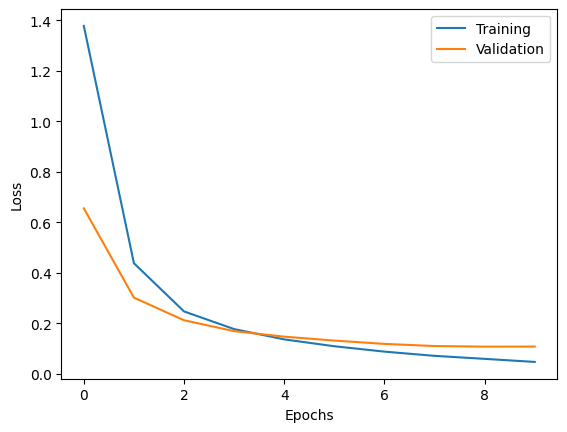

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

In [21]:
mlp.evaluate(x_testraveled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9674 - loss: 0.1095


[0.09574692696332932, 0.9713000059127808]